## 1. Business Understanding

### 1.1 Overview

>Online shopping refers to a delivery and pick-up service. This particular service  is offered by companies through a website and mobile app. The service allows customers to order items from participating retailers with the shopping being done by a personal shopper or company. 

>Covid-19 has changed the way the world operates. The ‘new normal’ has also seen dramatic increases in online shopping trends for apparent reasons. Contactless transactions are safer, and lockdowns have given people no choice but to use online platforms to purchase goods. As you know, however, don’t last forever. Still, once a customer has experienced the convenience and safety of an initially obligated online shopping experience, they are very likely to use it again even when they don’t have to.

>Some of the advantages of online shopping include; there are a variety of products, it's covenient, there are a lot of online discounts, there is buyer/shopping secrecy, the customers can avoid crowds, you can find unique/rare products and there is detailed information about the products that you are buying.

>To effect some of these advantages of online shopping a recommendation system or recommendation engine can be used for information filtering where it tries to predict the preferences of a user and provide suggestions based on these preferences. 


### 1.2 Business Objectives

>1. To particularly provide product recommendations and to look for unique ways to personalize marketing to customer base.

>2. To determine the month with the highest sales so as to plan the optimal time to give discounts

>3. To determine the peak hours of the day inorder to better strategize our marketing through online ads.


### 1.3 Determining The Project Goals

1. To come up with a recommendation systems that assists our customers who are mainly retailers in choosing products.
2. 

### 1.4 Determining the project success criteria 

>1. MAE

>2. RSME

## 2. Data Understanding

### 2.1 Collecting Data

In [371]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [372]:
#Loading Data and previewing the first five rows
df = pd.read_csv('data.csv',encoding= 'unicode_escape')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2.2 Describing the data

In [373]:
#Data Description
Description = pd.read_csv('data_description.csv',header=0,squeeze=True,dtype=str,keep_default_na=False,encoding='unicode_escape')

Description

,Column_Name,Description
0,InvoiceNo,"Invoice number. Nominal, a 6-digit integral n..."
1,StockCode,"Product (item) code. Nominal, a 5-digit integ..."
2,Description,Product (item) name. Nominal.
3,Quantity,The quantities of each product (item) per tra...
4,InvoiceDate,"Invoice Date and time. Numeric, the day and t..."
5,UnitPrice,"Unit price. Numeric, Product price per unit i..."
6,CustomerID,"Customer number. Nominal, a 5-digit integral ..."
7,Country,"Country name. Nominal, the name of the countr..."


In [374]:
#Looking at the shape of the data
df.shape

(541909, 8)

There are 541,909 rows and 8 columns in this data set

In [375]:
#looking at the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [376]:
# Summary statistics of the data set
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [377]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [378]:
df.duplicated().sum()

5268

## 3. Data Preparation

### 3.1 Creating a new data frame

#### 3.1.1 Splitting the date 

In [379]:
# Spliting the date to years, months, day and time
df['Month'] = df['InvoiceDate'].apply(lambda x : x.split('/')[0]).astype(np.uint8)
df['Day'] = df['InvoiceDate'].apply(lambda x : x.split('/')[1]).astype(np.uint8)
df['Year'] = df['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[0]).astype(np.uint16)
df['Time'] = df['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[1])
df['Hour']= df['Time'].apply(lambda x : x.split(':')[0]).astype(np.uint8)
df['Min']= df['Time'].apply(lambda x : x.split(':')[1]).astype(np.uint8)
df['datetime'] = list(map(lambda x : datetime.date(x[0],x[1],x[2]),df[['Year','Month','Day']].values) )
df['Day_week'] = list(map(lambda x :x.weekday(),df['datetime'].values)) # datetime.date(2017,12,25)
df['Day_week'] = df['Day_week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})
df = df.sort_values('datetime')

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed
2066,536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed
2067,536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed
2068,536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed
2069,536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed


#### 3.1.2 Adding Total Cost Column

In [380]:
# Calculating the total cost per order
df['Total_Amount'] = df['Quantity']*df['UnitPrice']
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed,15.30
2066,536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
2067,536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
2068,536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,1.25
2069,536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,6.75


In [381]:
#New data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
 8   Month         541909 non-null  uint8  
 9   Day           541909 non-null  uint8  
 10  Year          541909 non-null  uint16 
 11  Time          541909 non-null  object 
 12  Hour          541909 non-null  uint8  
 13  Min           541909 non-null  uint8  
 14  datetime      541909 non-null  object 
 15  Day_week      541909 non-null  object 
 16  Total_Amount  541909 non-null  float64
dtypes: float64(3), int64(1), object(8), uint16(1), u

In [382]:
#New data shape
df.shape

(541909, 17)

In [383]:
#New data set first 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed,15.30
2066,536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
2067,536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
2068,536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,1.25
2069,536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,6.75


### 3.2 Cleaning the Data

#### 3.2.1 Duplicates

In [384]:
#Looking at the duplicates in the data set

df.duplicated().sum()/len(df)*100

0.9721189350979592

In [385]:
#Dropping the duplicates from the data set
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,2010,8:26,8,26,2010-12-01,Wed,15.30
2066,536557,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/1/2010 14:41,3.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
2067,536557,22678,FRENCH BLUE METAL DOOR SIGN 3,3,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,3.75
2068,536557,22686,FRENCH BLUE METAL DOOR SIGN No,1,12/1/2010 14:41,1.25,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,1.25
2069,536557,22468,BABUSHKA LIGHTS STRING OF 10,1,12/1/2010 14:41,6.75,17841.0,United Kingdom,12,1,2010,14:41,14,41,2010-12-01,Wed,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540815,581492,22358,KINGS CHOICE TEA CADDY,1,12/9/2011 10:03,5.79,NaN,United Kingdom,12,9,2011,10:03,10,3,2011-12-09,Fri,5.79
540814,581492,22357,KINGS CHOICE BISCUIT TIN,2,12/9/2011 10:03,4.13,NaN,United Kingdom,12,9,2011,10:03,10,3,2011-12-09,Fri,8.26
540813,581492,22356,CHARLOTTE BAG PINK POLKADOT,1,12/9/2011 10:03,1.63,NaN,United Kingdom,12,9,2011,10:03,10,3,2011-12-09,Fri,1.63
540823,581492,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1,12/9/2011 10:03,4.13,NaN,United Kingdom,12,9,2011,10:03,10,3,2011-12-09,Fri,4.13


In [386]:
# Checking for duplicates after droping the duplicates
df.duplicated().sum()/len(df)*100

0.0

#### 3.2.2 Missing Values Treatment

Missing data in the E-commerce data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

In [387]:
# Sum of missing values as a percentage
df.isnull().sum()/len(df)* 100

InvoiceNo        0.000000
StockCode        0.000000
Description      0.270945
Quantity         0.000000
InvoiceDate      0.000000
UnitPrice        0.000000
CustomerID      25.163377
Country          0.000000
Month            0.000000
Day              0.000000
Year             0.000000
Time             0.000000
Hour             0.000000
Min              0.000000
datetime         0.000000
Day_week         0.000000
Total_Amount     0.000000
dtype: float64

In [388]:
#Checking the top 10 missing values
df1 = df[df.isna().any(axis=1)]

df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,Hour,Min,datetime,Day_week,Total_Amount
2102,536558,22802,FAUX FUR CHOCOLATE THROW,5,12/1/2010 14:48,19.95,NaN,United Kingdom,12,1,2010,14:48,14,48,2010-12-01,Wed,99.75
1969,536544,21758,VINTAGE SHELLS PRINT,1,12/1/2010 14:32,12.72,NaN,United Kingdom,12,1,2010,14:32,14,32,2010-12-01,Wed,12.72
1970,536545,21134,NaN,1,12/1/2010 14:32,0.00,NaN,United Kingdom,12,1,2010,14:32,14,32,2010-12-01,Wed,0.00
1971,536546,22145,NaN,1,12/1/2010 14:33,0.00,NaN,United Kingdom,12,1,2010,14:33,14,33,2010-12-01,Wed,0.00
1972,536547,37509,NaN,1,12/1/2010 14:33,0.00,NaN,United Kingdom,12,1,2010,14:33,14,33,2010-12-01,Wed,0.00
1968,536544,21742,LARGE ROUND WICKER PLATTER,1,12/1/2010 14:32,12.72,NaN,United Kingdom,12,1,2010,14:32,14,32,2010-12-01,Wed,12.72
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.00,NaN,United Kingdom,12,1,2010,14:34,14,34,2010-12-01,Wed,0.00
1988,536550,85044,NaN,1,12/1/2010 14:34,0.00,NaN,United Kingdom,12,1,2010,14:34,14,34,2010-12-01,Wed,0.00
1967,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,12/1/2010 14:32,3.36,NaN,United Kingdom,12,1,2010,14:32,14,32,2010-12-01,Wed,16.80
1965,536544,21721,CANDY SHOP STICKER SHEET,1,12/1/2010 14:32,1.66,NaN,United Kingdom,12,1,2010,14:32,14,32,2010-12-01,Wed,1.66


In [389]:
#checking the distribution of the data in 2010 and 2011
df['Year'].value_counts()/len(df)

2011    0.921771
2010    0.078229
Name: Year, dtype: float64

A large percentage of the data set is from 2011

In [390]:
# Checking the months with the highest missing values in 2011
df_2011 = df1.loc[lambda df1: df1["Year"]==2011]
df_2011['Month'].value_counts()[:20]

11    19111
1     13230
7     12011
10    10041
9      9402
6      9033
3      8923
5      8121
12     7864
8      7620
2      7341
4      6713
Name: Month, dtype: int64

From this analysis we can see that the missing values in 2011 are more during November, January, July and October.

In [391]:
#checking the months with the highest missing value in 2010
df_2010 = df1.loc[lambda df1: df1["Year"]==2010]
df_2010['Month'].value_counts()[:20]

12    15627
Name: Month, dtype: int64

In [392]:
df['Year'].value_counts()

2011    494660
2010     41981
Name: Year, dtype: int64

In [393]:
# Dropping all the null values in the data set
df=df.dropna()
df.isnull().sum()/len(df)* 100

InvoiceNo       0.0
StockCode       0.0
Description     0.0
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID      0.0
Country         0.0
Month           0.0
Day             0.0
Year            0.0
Time            0.0
Hour            0.0
Min             0.0
datetime        0.0
Day_week        0.0
Total_Amount    0.0
dtype: float64

#### 3.2.3 Outliers

Outliers in the Ecommerce data set can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

It increases the error variance and reduces the power of statistical tests

If the outliers are non-randomly distributed, they can decrease normality

They can bias or influence estimates that may be of substantive interest

They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

In this case we will use boxplots to identify the outliers.

##### 3.2.3.1 Unit Price

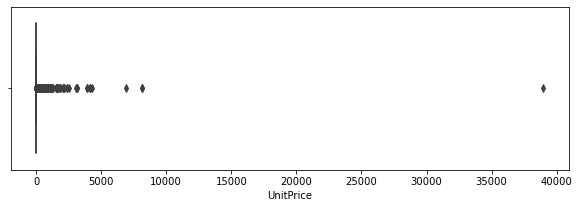

In [394]:
# identify the price outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'UnitPrice', data = df)

# Display the plot
plt.show()

In [395]:
i = df[(df['UnitPrice']>10000)].index

df = df.drop(i)

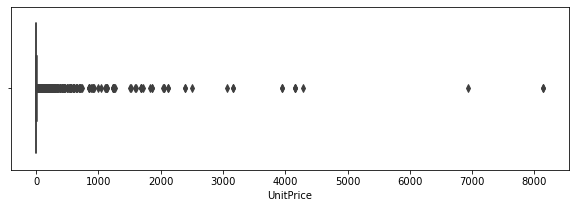

In [396]:
# identify the price outliers after removing the outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'UnitPrice', data = df)

# Display the plot
plt.show()

##### 3.2.3.2 Quantity

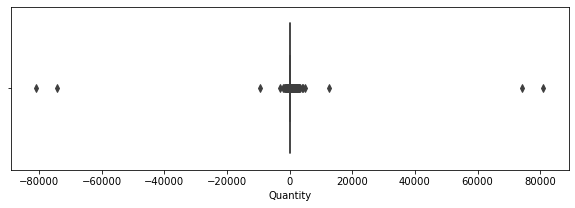

In [397]:
# identify the quantity outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'Quantity', data = df)

# Display the plot
plt.show()

In [398]:
i = df[(df['Quantity']>18000)].index

k = df[(df['Quantity']<-15000)].index

df = df.drop(i)
df = df.drop(k)

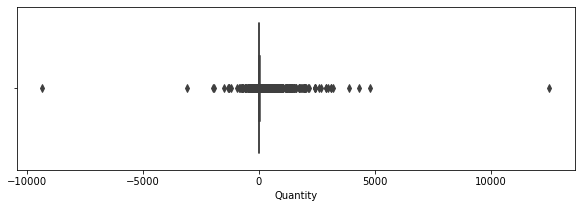

In [399]:
# identify the quantity outliers
plt.figure(figsize=(10,3))

sns.boxplot(x = 'Quantity', data = df)

# Display the plot
plt.show()

### 3.3.Exploratory Data Analysis

### 3.3.1.Univariate Analysis

#### 3.3.1.1. Orders

In [400]:

orders = df.groupby(by=['CustomerID'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

orders.head(10)

,CustomerID,Quantity
1702,14646.0,196719
54,12415.0,77242
1894,14911.0,77155
3757,17450.0,69009
4232,18102.0,64122
3800,17511.0,63012
1004,13694.0,61899
1446,14298.0,58021
1344,14156.0,56908
3201,16684.0,49390


#### 3.3.1.2. Country

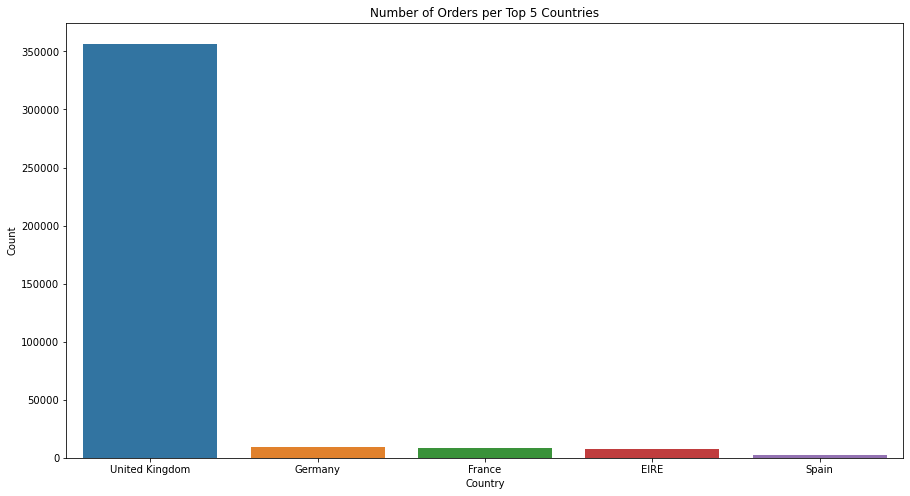

In [401]:
#Orders count plot
plt.figure(figsize=(15,8))

sns.countplot(x='Country', data= df, order=df['Country'].value_counts().iloc[:5].index)
plt.title('Number of Orders per Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### 3.3.1.3. Months

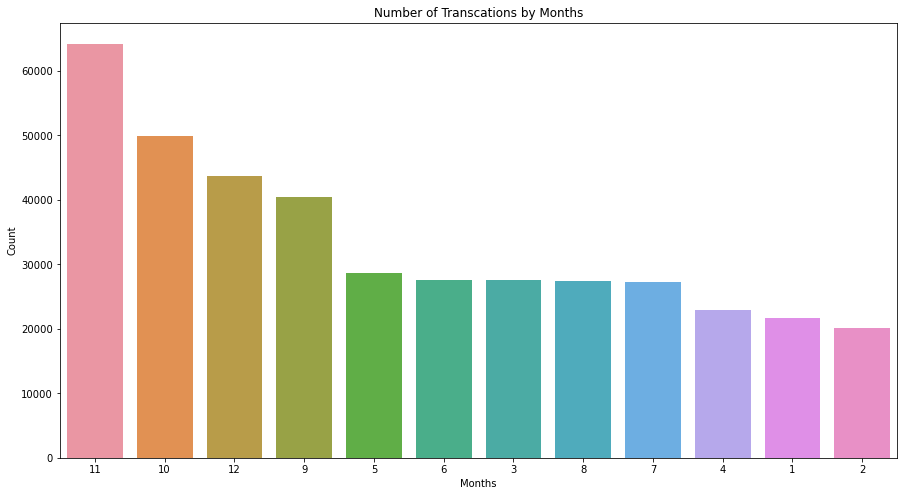

In [402]:
#Months count plot
plt.figure(figsize=(15,8))

sns.countplot(x='Month', data= df, order=df['Month'].value_counts().index)
plt.title('Number of Transcations by Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

#### 3.3.1.4. Time of Day

In [403]:
def get_time(Hour):
    if Hour < 12:
         return 'Morning'
    if Hour > 12 and Hour < 16:
        return 'Afternoon'
    else:
        return 'Evening'

In [404]:
df['time_day']=df['Hour'].apply(get_time)
df['time_day'].value_counts()

Afternoon    163885
Morning      119905
Evening      117809
Name: time_day, dtype: int64

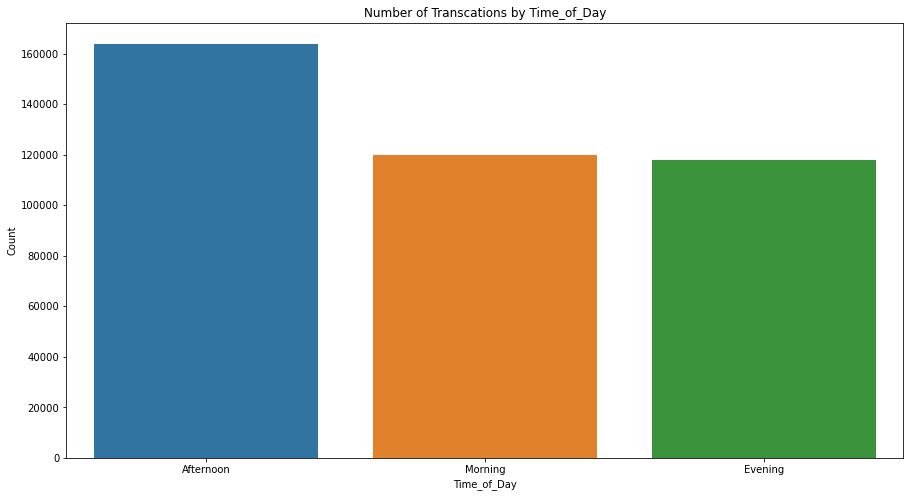

In [405]:
#Months count plot
plt.figure(figsize=(15,8))

sns.countplot(x='time_day', data= df, order=df['time_day'].value_counts().index)
plt.title('Number of Transcations by Time_of_Day')
plt.xlabel('Time_of_Day')
plt.ylabel('Count')
plt.show()

#### 3.3.1.5. Day of the Week

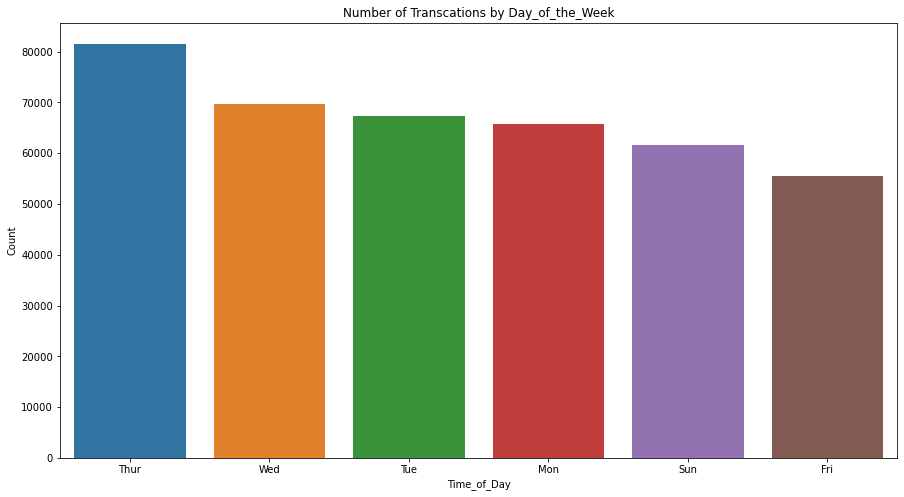

In [406]:
#Months count plot
plt.figure(figsize=(15,8))

sns.countplot(x='Day_week', data= df, order=df['Day_week'].value_counts().index)
plt.title('Number of Transcations by Day_of_the_Week')
plt.xlabel('Time_of_Day')
plt.ylabel('Count')
plt.show()

#### 3.3.1.5. Time

In [407]:
def get_time(Hour):
    if Hour < 12:
         return 'Morning'
    if Hour > 12 and Hour < 16:
        return 'Afternoon'
    else:
        return 'Evening'

### 3.3.2.Bivariate Analysis

#### 3.3.2.1 Total Amount vs Customer ID

#### 3.3.2.2 Total Amount vs Country

#### 3.3.2.3 Number of Orders per Day

#### 3.3.2.4 Number of Orders per Month

#### 3.3.2.5 Number of Orders per Customer per Country

In [408]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

orders.head(10)

,CustomerID,Country,Quantity
1710,14646.0,Netherlands,196719
56,12415.0,Australia,77242
1902,14911.0,EIRE,77155
3765,17450.0,United Kingdom,69009
4240,18102.0,United Kingdom,64122
3808,17511.0,United Kingdom,63012
1012,13694.0,United Kingdom,61899
1454,14298.0,United Kingdom,58021
1352,14156.0,EIRE,56908
3209,16684.0,United Kingdom,49390
